<a href="https://colab.research.google.com/github/robbymugiakbar/Pengolahan-Citra/blob/main/Histogram_Equalization_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-ea54b00f6630>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread('/content/sample_data/image.jpg')


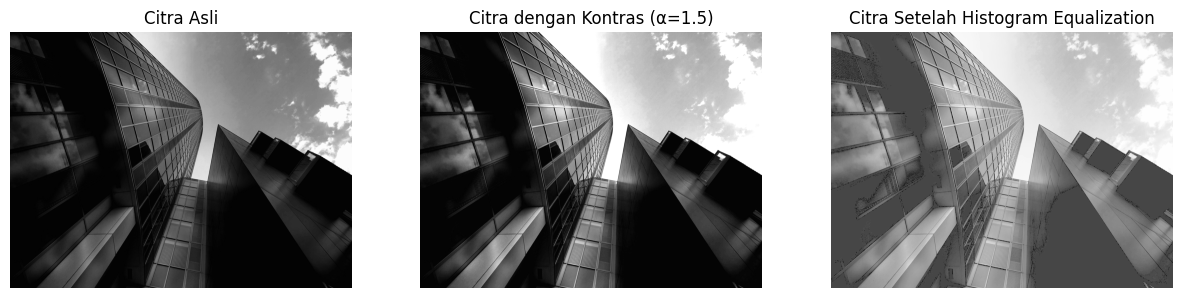

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Baca citra asli
original_image = imageio.imread('/content/sample_data/image.jpg')

# Konversi citra ke grayscale jika citra berwarna
if len(original_image.shape) == 3:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# **1. Meningkatkan Kontras dengan Alpha = 1.5**
alpha = 1.5  # Level kontras
beta = 0     # Tidak ada perubahan pada brightness
contrast_image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)

# **2. Menerapkan Histogram Equalization**
# Hitung histogram dan CDF untuk histogram equalization
histogram, bins = np.histogram(original_image.flatten(), bins=256, range=[0, 256])
cdf = histogram.cumsum()
cdf_normalized = cdf * histogram.max() / cdf.max()  # Normalisasi CDF

# Terapkan histogram equalization
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
equalized_image = cdf_final[original_image.astype('uint8')]

# **3. Tampilkan Hasil**
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Citra Asli')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Citra dengan Kontras (α=1.5)')
plt.imshow(contrast_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Citra Setelah Histogram Equalization')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()